In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="darkgrid")

In [ ]:
# Define stock symbols and time range
stock_symbols = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start_date = "2020-01-01"
end_date = "2021-01-01"

# Fetch historical stock data for multiple stocks
data = yf.download(stock_symbols, start=start_date, end=end_date)

# Select the "Close" prices as the feature for each stock
data = data['Close']

# Split the data into training and testing sets
train_data = data.iloc[:int(0.8 * len(data))]
test_data = data.iloc[int(0.8 * len(data)):]

# Create a linear regression model for each stock
models = {}
for stock_symbol in stock_symbols:
    model = LinearRegression()
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[stock_symbol].values
    model.fit(X_train, y_train)
    models[stock_symbol] = model

# Prepare testing data and make predictions
predictions = {}
for stock_symbol in stock_symbols:
    model = models[stock_symbol]
    X_test = np.arange(len(train_data), len(data)).reshape(-1, 1)
    y_test = test_data[stock_symbol].values
    predictions[stock_symbol] = model.predict(X_test)

# Calculate mean squared error for each stock
mse = {}
for stock_symbol in stock_symbols:
    y_test = test_data[stock_symbol].values
    mse[stock_symbol] = mean_squared_error(y_test, predictions[stock_symbol])
    print(f"Mean Squared Error for {stock_symbol}: {mse[stock_symbol]}")


[*********************100%***********************]  4 of 4 completed
Mean Squared Error for AAPL: 25.030846743591052
Mean Squared Error for GOOG: 80.88936846908166
Mean Squared Error for MSFT: 207.0128702738556
Mean Squared Error for AMZN: 646.3513148618403


In [ ]:
data.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-02,75.087502,94.900497,68.368500,160.619995
2020-01-03,74.357498,93.748497,68.032997,158.619995
2020-01-06,74.949997,95.143997,69.710503,159.029999
2020-01-07,74.597504,95.343002,69.667000,157.580002
2020-01-08,75.797501,94.598503,70.216003,160.089996


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:143: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:143: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:143: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:143: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['AAPL'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['AMZN'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['GOOG'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['MSFT'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['AAPL'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['AMZN'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['GOOG'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['MSFT'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_17, *[[['AAPL', 'AMZN'], ['AMZN', 'GOOG'], ['GOOG', 'MSFT']]], **{})
chart

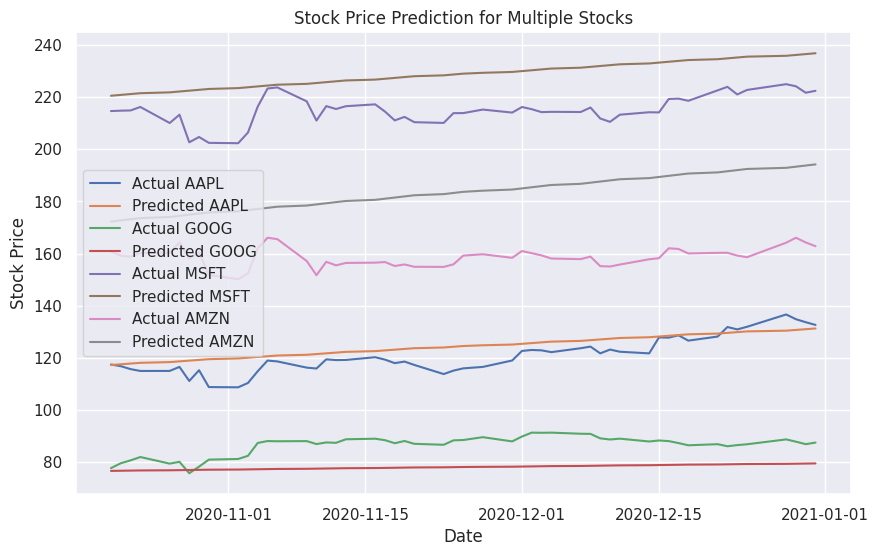

In [ ]:
# Plot actual and predicted stock prices for each stock
plt.figure(figsize=(10, 6))
for stock_symbol in stock_symbols:
    plt.plot(test_data.index, test_data[stock_symbol].values, label=f'Actual {stock_symbol}')
    plt.plot(test_data.index, predictions[stock_symbol], label=f'Predicted {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for Multiple Stocks')
plt.legend()
plt.show()

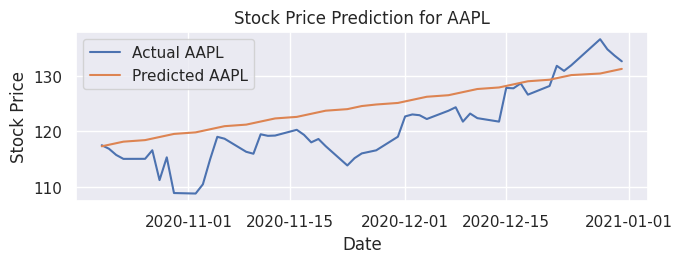

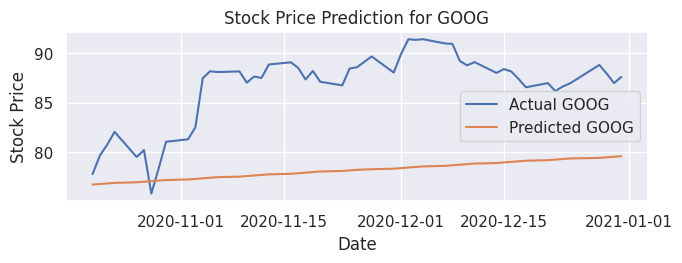

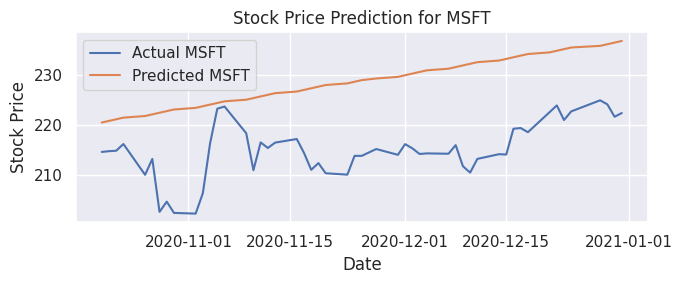

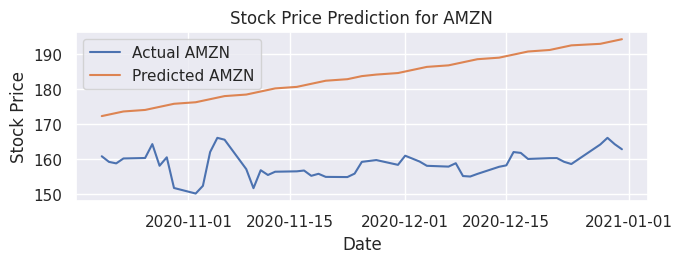

In [ ]:
# Plot actual and predicted stock prices for each stock separately
for stock_symbol in stock_symbols:
    plt.figure(figsize=(7,3))
    plt.subplots_adjust(top=1.25, bottom=1.2)
    plt.plot(test_data.index, test_data[stock_symbol].values, label=f'Actual {stock_symbol}')
    plt.plot(test_data.index, predictions[stock_symbol], label=f'Predicted {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Prediction for {stock_symbol}')
    plt.legend()
    # plt.show()
    plt.tight_layout()